The Data that was collected can be found [Here](https://www.kaggle.com/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset)

## Customers Response

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

df_sample = pd.read_csv('ProjectData.csv')
df_sample.head()

,Number,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,1,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,3,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,4,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,5,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [2]:
#Selecting sample data
sample = df_sample['Improvement_Areas']
sample_size = sample.count()

#Display sample information
print(sample.value_counts().head())
print('Sample Size :', sample_size)

Customer service responsiveness                                217
Product quality and accuracy                                   159
Reducing packaging waste                                       133
Shipping speed and reliability                                  79
Quality of product is very poor according to the big offers      1
Name: Improvement_Areas, dtype: int64
Sample Size : 602


In [3]:
# Calculate the ratio of sample
proportion = sample.value_counts() / sample_size

# Create a data frame consist both propotion and raito
sample_table = pd.DataFrame({'Proportion' : sample.value_counts(), 'Ratio': proportion.values})

# Display the proportion DataFrame
sample_table.head()

,Proportion,Ratio
Customer service responsiveness,217,0.360465
Product quality and accuracy,159,0.264120
Reducing packaging waste,133,0.220930
Shipping speed and reliability,79,0.131229
Quality of product is very poor according to the big offers,1,0.001661


### Calculate the proportion
p̂ = a / n

In [4]:
#Sample Size
n = 601
a = 217

# P_Hat already on the table
p_hat = a/n
p_hat

0.3610648918469218

In [5]:
print((round(p_hat, 3)*100),"% of our cusotomers feels that our customer services need to be more responsives")

36.1 % of our cusotomers feels that our customer services need to be more responsives


### Confidence Interval 95%
Because the N population is unknown, we use this formula
***
![formula](Picture1.png)
***

In [6]:
#Variance p_hat
var_p_hat = (p_hat * (1 - p_hat)) / (n - 1)
var_p_hat

0.00038449505953748746

In [7]:
print("With 601 first sample drawn (n = 601), we got variance", var_p_hat)

With 601 first sample drawn (n = 601), we got variance 0.00038449505953748746


Because the sample size that we have is n > 30, we use z-score to calculate MoE  
MOE_γ = z_γ × √(σ^2)

In [8]:
#Confidence Interval 95%
alpha = 0.05

#Z-score
z_stat = stats.norm.ppf(q=1-(alpha/2))
z_stat

1.959963984540054

In [9]:
#Margin of Error
d = z_stat * np.sqrt(var_p_hat)
d

0.03843204311474468

In [10]:
print('With', var_p_hat, 'Variance, we got Margin of Error (d)', d)

With 0.00038449505953748746 Variance, we got Margin of Error (d) 0.03843204311474468


### Calculate Upper and Lower Bound

In [11]:
#Error Bound
upper_inv = p_hat + d
lower_inv = p_hat - d
print('Lower Bound :', lower_inv, 'Upper Bound :', upper_inv)

Lower Bound : 0.3226328487321771 Upper Bound : 0.3994969349616665


In [35]:
print('We are 95% confidence that the proportion of population is around', (round(lower_inv, 2) * 100), '% to ', (round(upper_inv, 2) * 100), '%' )

We are 95% confidence that the proportion of population is around 32.0 % to  40.0 %


With sample 601 (n), we can summarize that 36.1 % of our cusotomers feels that our customer services need to be more responsives  
and we can assume that it represents the true value of population given the margin of errors (d) 0.0385 or 4%. With lower bound  
32.2% to upper bound 39.9%.

## Calculating Sample Size
we want to calculate sample size for the next draw, we do that by reducing MoE by 25% we're using this formula under the assumption that N >> n 
  
![sample_size](Picture2.png)


In [13]:
# Calculate new d (25%)
d_new = (1 - 0.25) * d
d_new

0.028824032336058507

In [14]:
#Calculate next sample size
p = 0.5 # N is unknown

n_new = (p * (1 - p)) * ((z_stat / d_new )**2)
n_new

1155.917178699437

In [15]:
print('The sample size of second the draw will be', round(n_new))

The sample size of second draw will be 1156


## Conclusion 

After performing calculation and analysis from first sample drawn, it can be concluded that the majority of customers (36.1%)  
feels that the service that needs improving is Customer Service Responsiveness. It is possible that customers feels that the   
AI customer services still lack 'human' response. 

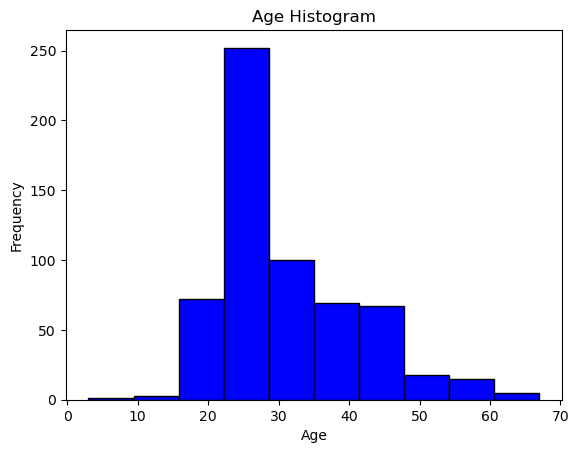

In [24]:
import matplotlib.pyplot as plt

sample_age = df_sample['age'].value_counts()

# Assuming you have the DataFrame with the 'Age' column
data = pd.DataFrame({'Age': df_sample['age'].values})

# Create a histogram
plt.hist(data['Age'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')

# Show the plot
plt.show()


This conclusion is also backed by the age distribution. If we look at the age distribution, it concentrate at age between  
18 - 30 years old. As we know, that AI feature is quite trending around young adult. However due to it's conviniency  
to draw a second sample, it is probably best to perform another sampling to be certain.